In [2]:
pip install wordcloud

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ------------------------------------ 153.1/153.1 kB 415.2 kB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

In [5]:
startup = pd.read_csv("Indian Startup.csv")

In [6]:
startup.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","$35,000,000",Series B,Dec-2021
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"$40,000,000",NaN,Dec-2021
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","$40,000,000",Series B,Dec-2021
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,"$50,000,000",NaN,Dec-2021
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"$4,900,000",Series A,Dec-2021


In [7]:
startup.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","$35,000,000",Series B,Dec-2021
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"$40,000,000",NaN,Dec-2021
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","$40,000,000",Series B,Dec-2021
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,"$50,000,000",NaN,Dec-2021
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"$4,900,000",Series A,Dec-2021


In [8]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   Headquarters   1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founder/s      1205 non-null   object 
 6   Investor/s     1146 non-null   object 
 7   Amount         1202 non-null   object 
 8   Stage          781 non-null    object 
 9   Date           1209 non-null   object 
dtypes: float64(1), object(9)
memory usage: 94.6+ KB


In [9]:
startup.shape

(1209, 10)

Data Cleaning

Replacing unknown values in stage with "Unknown".


In [10]:
startup.Stage.replace(np.NaN, "Unknown",inplace=True)
startup.isnull().sum()

Company/Brand     0
Founded           1
Headquarters      1
Sector            0
What it does      0
Founder/s         4
Investor/s       63
Amount            7
Stage             0
Date              0
dtype: int64

Deletion of rows having null values in columns having less than 10% missing values

In [11]:
startup=startup.dropna()

In [12]:
startup.isnull().sum()

Company/Brand    0
Founded          0
Headquarters     0
Sector           0
What it does     0
Founder/s        0
Investor/s       0
Amount           0
Stage            0
Date             0
dtype: int64

In [13]:
startup.shape

(1133, 10)

EDA

1. Citywise Analysis


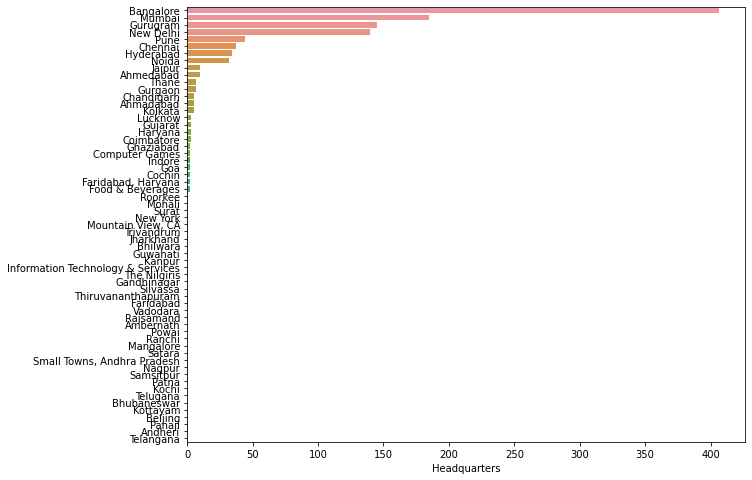

In [14]:
city = pd.DataFrame(startup['Headquarters'].value_counts().sort_values(ascending = False))

plt.figure(figsize = (10,8))
ax = sns.barplot(x = city['Headquarters'], y = city.index)

plt.show()

As we can see there are way too many cities in the graph to draw any meaningful insight. Hence we'll focus on the top 10

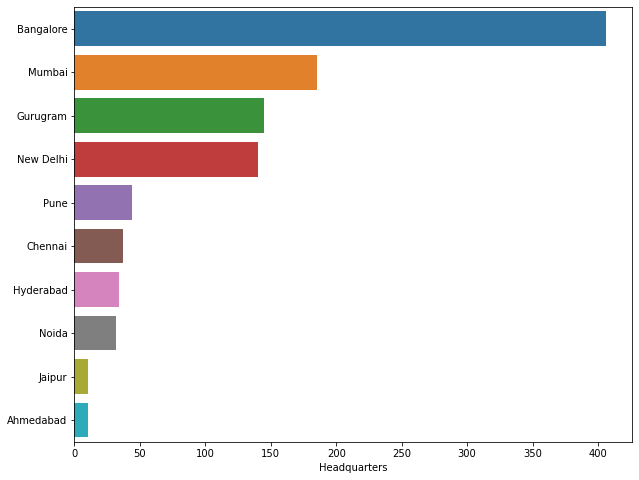

In [15]:
city = pd.DataFrame(startup['Headquarters'].value_counts().sort_values(ascending = False))
cities_top_10 = city.head(10)
plt.figure(figsize = (10,8))
ax = sns.barplot(x = cities_top_10['Headquarters'], y = cities_top_10.index)

plt.show()

Top cities for startups are Bangalore, Mumbai, Gurugram and New Delhi.

2.Sector

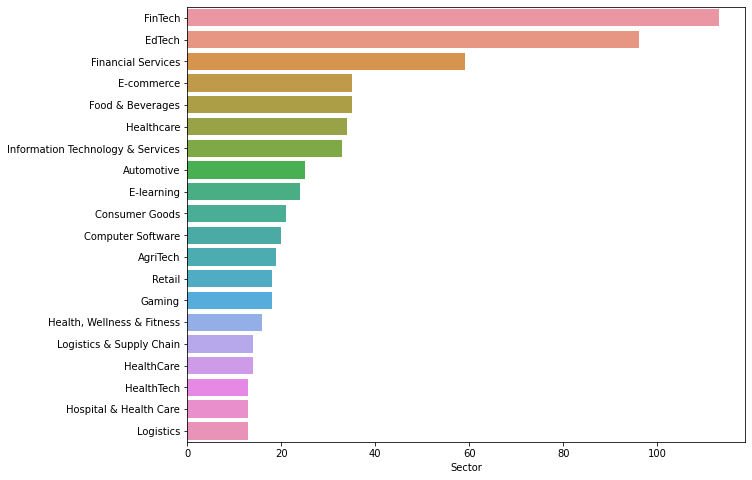

In [16]:
sector = pd.DataFrame(startup['Sector'].value_counts().sort_values(ascending = False))
sector_top_20 = sector.head(20)
plt.figure(figsize = (10,8))
ax = sns.barplot(x = sector_top_20['Sector'], y = sector_top_20.index)

plt.show()

Top sectors for startups are Fintech,Edtech and Financial Services.

3. Funding Stage

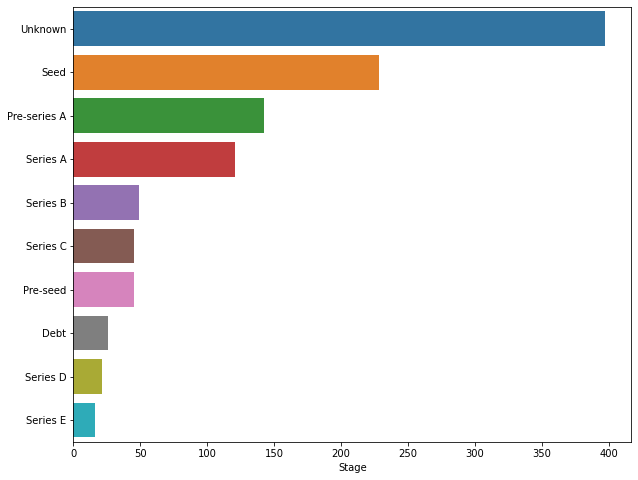

In [17]:
stage = pd.DataFrame(startup['Stage'].value_counts().sort_values(ascending = False))
stage_top_10 = stage.head(10)
plt.figure(figsize = (10,8))
ax = sns.barplot(x = stage_top_10['Stage'], y = stage_top_10.index)

plt.show()

4. Investors

To analyse the data of the investors, we will have to split the data of the investors column.

In [18]:
#Splitting Investors column
investors = startup['Investor/s'].str.split(',', expand = True)
startup = pd.concat([startup, investors],axis=1)

In [19]:
startup.rename(columns={0:'Investor 1',1:'Investor 2',2:'Investor 3',3:'Investor 4',4:'Investor 5',5:'Investor 6'}, inplace=True)
startup.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date,Investor 1,Investor 2,Investor 3,Investor 4,Investor 5,Investor 6
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","$35,000,000",Series B,Dec-2021,Disrupt ADQ,QIC,None,None,None,None
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"$40,000,000",Unknown,Dec-2021,Tiger Global,None,None,None,None,None
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","$40,000,000",Series B,Dec-2021,Valar Ventures,IA Ventures,None,None,None,None
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"$4,900,000",Series A,Dec-2021,Sequoia Capital India,None,None,None,None,None
5,Curefit,2016.0,Bangalore,"Health, Wellness & Fitness",Tata Digital-backed Curefit,"Mukesh Bansal, Ankit",Zomato,"$145,000,000",Unknown,Dec-2021,Zomato,None,None,None,None,None


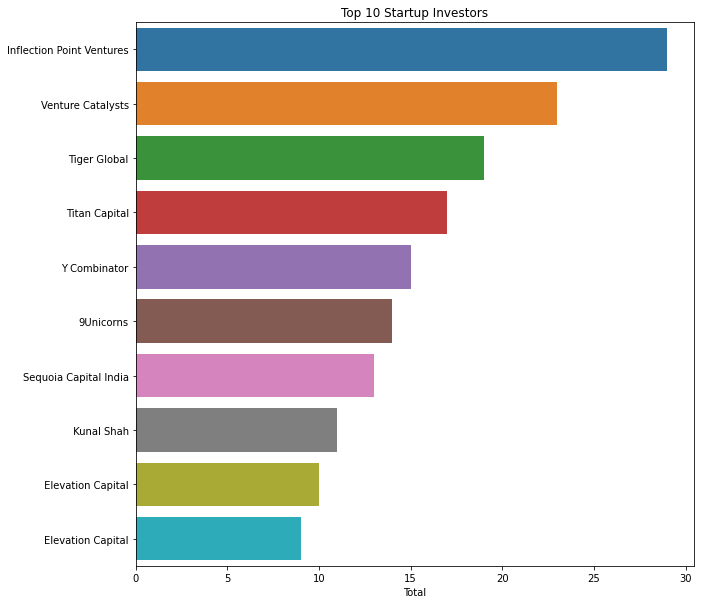

In [20]:
investors = startup[['Investor 1','Investor 2','Investor 3','Investor 4','Investor 5','Investor 6']].apply(pd.Series.value_counts)

investors['Total'] = investors.sum(axis=1)
investors = investors.sort_values(by = 'Total',ascending=False)
investors_top_10 = investors.head(10)

plt.figure(figsize = (10,10))
ax = sns.barplot(x = investors_top_10.Total, y = investors_top_10.index)


plt.title('Top 10 Startup Investors')
plt.show()

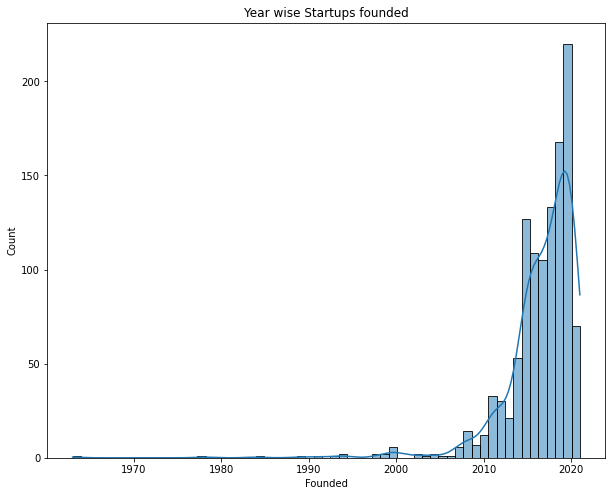

Maximum No of Startups founded in year 2020


In [21]:
plt.figure(figsize = (10,8))
sns.histplot(startup['Founded'], kde = True)
plt.title('Year wise Startups founded')
plt.show()

max_startups_year = round(startup['Founded'].value_counts().sort_values(ascending = False).idxmax())
print(f'Maximum No of Startups founded in year {max_startups_year}')

Maximum No of Startups founded in year 2020

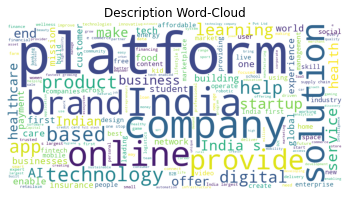

In [22]:
wordcloud = WordCloud(width=960, height=480, background_color="white").generate(' '.join(startup['What it does']))
wordcloud
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Description Word-Cloud')
plt.show()